# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

**Veri Kümesi Bilgileri:**

Türkiye'de yetiştirilen iki üzüm türüne (Kecimen ve Besni) ait veriler var

Bunları sınıflandırmaya çalışacağız

Normalde elimizde image olsaydı deep learning ile sınıfladırma yapabilirdik.


- Türkiye'de yetiştirilen Keçimen ve Besni kuru üzüm çeşitlerinin CVS yöntemi ile görüntüleri elde edilmiştir.

- Bu görüntüler çeşitli ön işleme aşamalarından geçirilmiş ve 7 morfolojik özellik çıkarılmıştır.

- Git benzeri bir açık kaynaklı versiyon kontrol sistemi olan CVS (Concurrent Versions System) kullanılmıştır.

- Her iki çeşitten 450 adet olmak üzere toplam 900 adet kuru üzüm tanesi kullanılmıştır.

- Bu özellikler üç farklı yapay zeka tekniği kullanılarak sınıflandırılmıştır.


**Area:** Kuru üzümün sınırları içindeki piksel sayısını verir.

**Perimeter:** Kuru üzümün sınırları ile çevresindeki pikseller arasındaki mesafeyi hesaplayarak çevreyi ölçer.

**MajorAxisLength:** Üzüm üzerine çizilebilecek en uzun çizgi olan ana eksenin uzunluğunu verir.

**MinorAxisLength:** Üzüm üzerine çizilebilecek en kısa çizgi olan küçük eksenin uzunluğunu verir.

**Eccentricity:** Kuru üzümlerle aynı momentlere sahip olan elipsin eksantrikliğinin bir ölçüsünü verir. Bir elipsin şeklinin uzun aksı ile kısa aksı arasındaki farkın uzun aksa bölünmesiyle elde edilen bir orandır. Bu oran, elipsin şeklinin ne kadar "uzun" veya "düz" olduğunu ölçer.

**ConvexArea:** Kuru üzümün oluşturduğu bölgenin en küçük dışbükey kabuğunun piksel sayısını verir. En küçük dışbükey kabuk, belirli bir şekli tamamen kaplayan en küçük dışbükey çokgeni ifade eder. Kuru üzüm şeklini çevreleyen en küçük dışbükey çokgenin piksel sayısı

**Extent:** Kuru üzümün oluşturduğu bölgenin sınırlayıcı kutudaki toplam piksellere oranını verir.

**Class:** Kecimen and Besni kuru üzümleri.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

**plotly.express:** Plotly'nin yüksek seviyeli, daha basit bir arayüze sahip olan grafik oluşturma kütüphanesidir.

**cufflinks:** Plotly'nin Pandas DataFrame'leriyle doğrudan etkileşimli Plotly görselleştirmeleri oluşturmasını sağlar.

**download_plotlyjs, init_notebook_mode, plot, iplot:** Bu fonksiyonlar, Jupyter Notebook'ta etkileşimli grafiklerin çevrimdışı olarak görüntülenmesini sağlar.

**init_notebook_mode(connected=True):** Jupyter Notebook'ta etkileşimli Plotly görselleştirmelerini görüntülemek için bu modu başlatır. connected=True argümanı, bu görselleştirmelerin çevrimiçi Plotly sunucusuna bağlanmadan yerel olarak çalıştırılmasını sağlar.

**cf.go_offline():** cufflinks kütüphanesini çevrimdışı modda çalıştırmak için kullanılır. Jupyter Notebook'ta çevrimdışı etkileşimli grafikler oluşturmanıza olanak tanır.

**%matplotlib inline:** Jupyter Notebook'ta matplotlib kütüphanesi ile oluşturulan grafiklerin doğrudan hücre çıktıları olarak görüntülenmesini sağlar. 

## Exploratory Data Analysis and Visualization

In [1]:
df = pd.read_excel("Raisin_Dataset.xlsx") #import data set

<IPython.core.display.Javascript object>

In [2]:
df.head()  # Classlar 0-1 değil !

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [80]:
df.shape

(900, 8)

In [81]:
df.duplicated().sum() 

0

In [82]:
df.isnull().sum().any() 

False

In [3]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


In [84]:
df["Class"].value_counts()  

Kecimen    450
Besni      450
Name: Class, dtype: int64

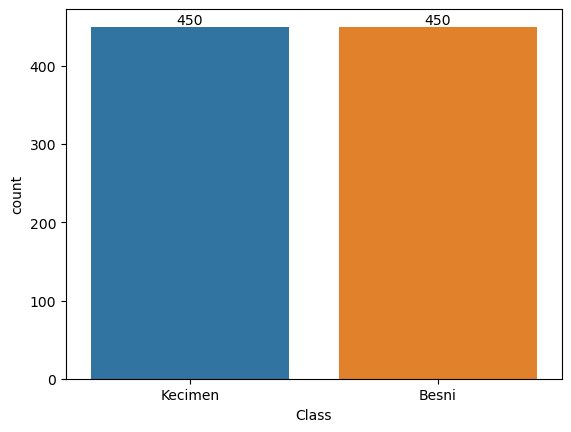

In [85]:
ax= sns.countplot(df["Class"])
ax.bar_label(ax.containers[0]); 

# balanced bir data
# balanced datalarda hangi skora bakabiliriz?

**Balanced (dengeli) bir veri seti**, sınıflandırma problemlerinde her bir sınıfın benzer sayıda örnek içerdiği bir veri setidir. Örn; Kecimen: 450 - Besni: 450

**Unbalanced-Imbalanced (dengesiz) veri seti**, bir sınıfın diğerlerine göre çok daha fazla örneğe sahip olduğu durumlarda ortaya çıkar. Örn; diyabet (1): 3000 - diyabet olmayan (0): 500

Bu veri seti özelinde aynı sayıda iki sınıfa sahibiz. Bu yüzden modelin performansını değerlendirmek için **accuracy** kullanabiliriz.

In [86]:
df["Class"] = df["Class"].map({"Kecimen":0,"Besni":1}) 

# Kecimeni 0 Besniyi 1 olacak şekilde mapledik
# Bu şekilde yapmasak da olurdu, direkt isimler ile de tahmin alabiliriz

In [87]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,1
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,1
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,1


- Logistik regresyonda, katsayıların doğru tahmin edilmesi için multikolinaritinin önemi lineer regresyona göre daha azdır.

- Logistik regresyonda, bağımlı değişken kategorik olduğu için doğrusal bir model kullanılmaz. 

- Burda katsayıların yorumlanması odds üzerinden yapılır.

- Logistik regresyon, bağımlı değişkenin olasılığını tahmin eder. 

- Bu durumda, bağımsız değişkenlerin birbirleriyle yüksek derecede korele olması, lojistik regresyonun performansını etkilemez.

- Ancak, aşırı multikolinarity, log reg un doğruluğunu ve güvenilirliğini azaltabilir ve sonuçları yanıltıcı hale getirebilir.

- Ayrıca; logistic regresyonda arkada planda l1 ve l2 çalıştığı için bu sorun giderilir.

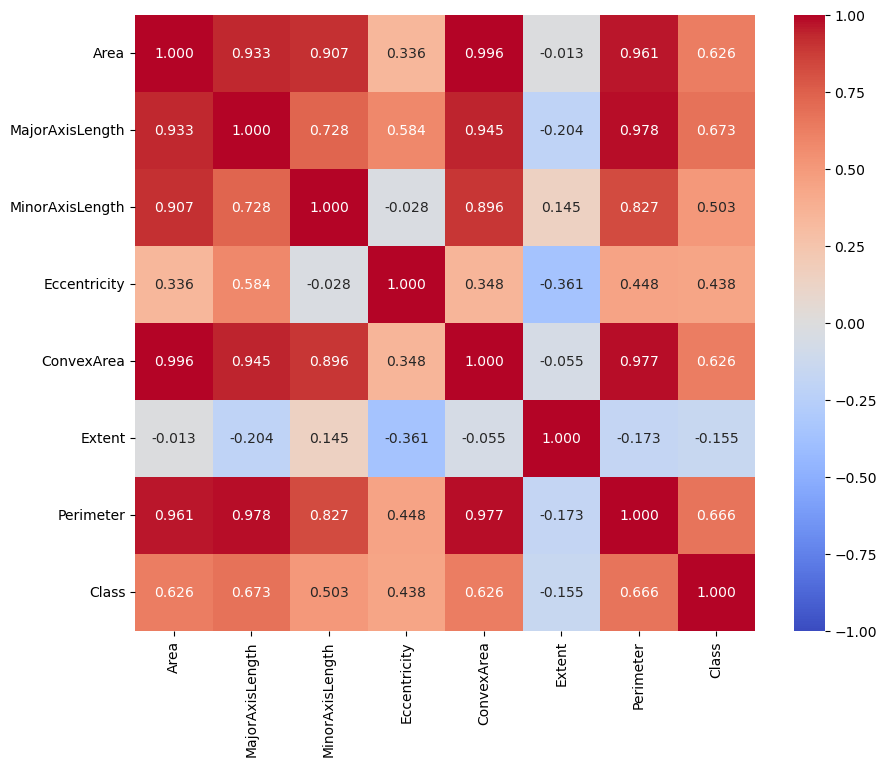

In [92]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(),vmin=-1,vmax=1, annot=True, fmt='.3f', cmap='coolwarm');

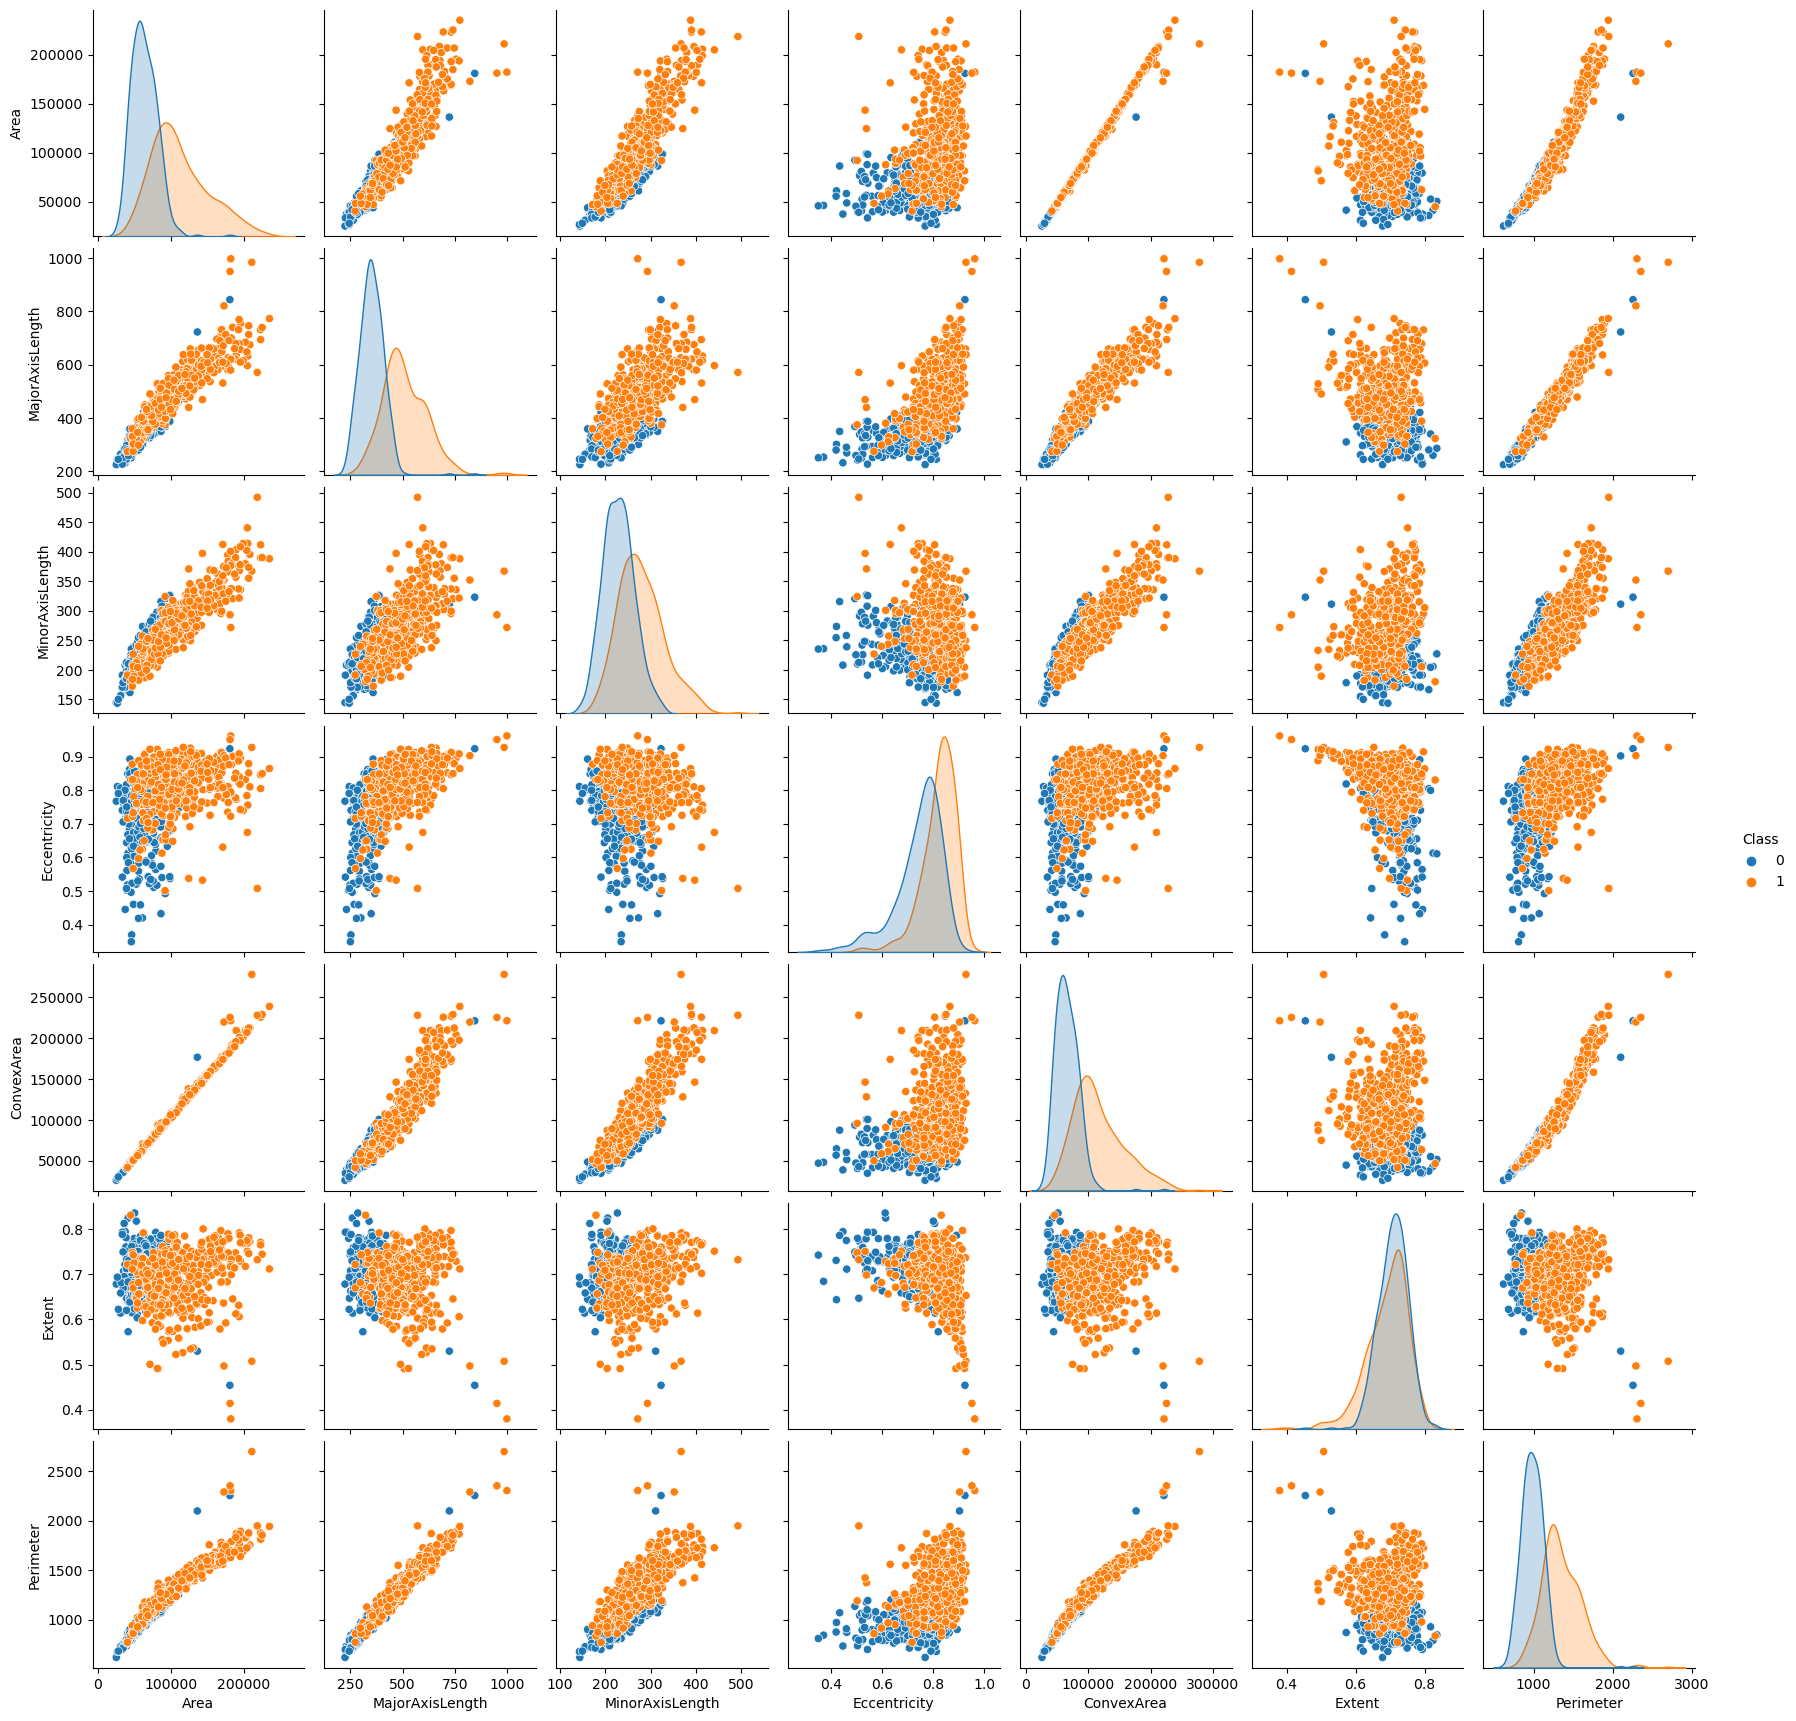

In [94]:
sns.pairplot(df, hue = "Class");

# classların birbirinden net bir şekilde ayrıştığı yer göremiyorum
# ama iki boyutlu baktığımızı unutmayalım

## Train | Test Split and Scaling

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [97]:
X=df.drop(["Class"], axis=1)
y=df["Class"]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

**stratify:** veri setini eğitim ve test setlerine ayırırken sınıf oranlarının korunmasını sağlar. 

**stratify=y:** Eğer veri setinizdeki sınıflar dengesizse (örneğin, bir sınıfın örnek sayısı diğerine göre çok daha fazlaysa), rastgele bir eğitim-test ayrımı yapmak, test setinde bazı sınıfların hiç temsil edilmemesine veya çok az temsil edilmesine neden olabilir. stratify parametresi, bu tür dengesizliklerde bile eğitim ve test setlerindeki sınıf dağılımlarının, orijinal veri setindeki sınıf dağılımıyla aynı olmasını garantiler.

stratify parametresine, sınıf etiketlerini içeren diziyi (genellikle hedef değişken -y-) vererek kullanılır. Bu, eğitim ve test setlerinin ayrılması sırasında sınıf oranlarının korunmasını sağlar.

stratify parametresinin varsayılan değeri -None-. Bu, eğitim ve test setlerinin rastgele ayrılacağı ve sınıf oranlarının korunmayacağı anlamına gelir. Eğer sınıf oranlarını korumak istiyorsanız, bu parametreyi hedef değişken y ile belirtmelisiniz.

# Logistic Regression without Pipeline

- **Logistic Regression**,  bir classification (sınıflandırma) metodudur.

- Verilerin belirli bir sınıflandırma kriterine göre ayrılmasını sağlar. 

- Verilerin ikili sınıflarda ayrılmasını veya multi-class sınıflarda ayrılmasını sağlar.

- Bu nedenle sınıflandırma sorunlarını çözen bir metod olarak kategorize edilir.

- Sigmoid fonksiyonu, girdi değerlerini 0 ile 1 arasında sınırlayan bir tür aktivasyon fonksiyonudur.

- Threshold değeri default 0.5 ama değiştirilebilir.

- Logistik regresyonda katsayıları yorumlarken lineer regresyondaki gibi direk yorum yapamıyoruz, odds oranları üzerinden yorum yapabiliyoruz. 

- Logistik regression bizim bildiğimiz klasik linear regression denklemimizi (b2*X2 + b1*X1 +b0) olasılığa (probability) dönüştürür.

- **Threshold değeri,** modelin tahmin ettiği olasılıkları binary olarak sınıflandırması için kullanılan bir değerdir. Optimal threshold değeri, sınıflandırma performansını en yüksek hale getirmek için belirlenir.

**Nerelerde kullanılır?**

- Ikili sınıflandırma sorunlarının çözümü (örneğin: spam/ham e-postalar)
- Öncelikli sınıflandırma sorunlarının çözümü (örneğin: öncelikli/normal e-postalar)
- Tıbbi verilerin sınıflandırılması (örneğin: hastalık/sağlıklı)
- Finansal verilerin sınıflandırılması (örneğin: kârlı/zararlı hisse senetleri)
- Reklam verilerinin sınıflandırılması (örneğin: ilgi alanına uygun/uygun olmayan reklamlar)

In [99]:
scaler = StandardScaler()

In [100]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# fit işlemi sadece train setine uygulanır ve train setindeki bilgilere istinaden hem train hem de test setine dönüşüm
# uygulanur.

In [101]:
log_model = LogisticRegression()

# Modeli aynı şekilde kuruyoruz.

In [102]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [103]:
log_model.coef_

array([[-0.00062589, -0.02341984, -0.06778538, -0.00035299,  0.00078995,
        -0.0003472 ,  0.00996094]])

# Logistic Regression with Pipeline

**Pipeline**, bir veri işleme sürecindeki adımların birbirine bağlı bir şekilde işlendiği bir kavramdır. 

Bir pipeline, genellikle birkaç adım içerir ve her adım, bir önceki adımın çıktısı üzerinde işlem yapar ve bir sonraki adıma girdi sağlar. 

In [104]:
scaler = StandardScaler()

In [105]:
log_model = LogisticRegression()

In [106]:
log_pipe = Pipeline([("scaler",scaler),("log_model",log_model)]) 

In [107]:
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_model', LogisticRegression())])

In [108]:
# operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]
# pipe_model = Pipeline(steps=operations)
# pipe_model.fit(X_train, y_train)

In [109]:
y_pred=log_pipe.predict(X_test)
y_pred

# predict test datasının hangi classlara ait olduğunu tahmin eder.

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0], dtype=int64)

In [110]:
y_pred_proba = log_pipe.predict_proba(X_test)
y_pred_proba

# predict_proba test datasındaki gözlemlerin hangi olasılıkla hangi sınıfa atandığını gösterir. İlk değer 0 sınıfına
# ait olma olasılığı iken ikinci değer 1 sınıfına ait olma olasılığını gösterir. Hangi değer büyükse o sınıfa atanır. 

array([[9.09233226e-01, 9.07667744e-02],
       [2.13923600e-01, 7.86076400e-01],
       [8.61366061e-01, 1.38633939e-01],
       [9.75006614e-01, 2.49933859e-02],
       [7.18428741e-01, 2.81571259e-01],
       [9.78090204e-01, 2.19097960e-02],
       [9.67153729e-01, 3.28462709e-02],
       [2.69784269e-01, 7.30215731e-01],
       [6.22413524e-01, 3.77586476e-01],
       [8.28165778e-01, 1.71834222e-01],
       [5.50087417e-01, 4.49912583e-01],
       [6.48124125e-01, 3.51875875e-01],
       [1.33636635e-03, 9.98663634e-01],
       [7.34673174e-03, 9.92653268e-01],
       [2.22192344e-04, 9.99777808e-01],
       [4.06025195e-03, 9.95939748e-01],
       [1.03563509e-04, 9.99896436e-01],
       [2.05679569e-01, 7.94320431e-01],
       [8.80378670e-01, 1.19621330e-01],
       [7.27309014e-01, 2.72690986e-01],
       [9.54065988e-01, 4.59340125e-02],
       [6.00635256e-04, 9.99399365e-01],
       [7.48381106e-01, 2.51618894e-01],
       [9.86770325e-01, 1.32296753e-02],
       [2.814178

## X_test + y_yest + y_pred + y_pred_proba

In [111]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

# Öncelikle X_test ve y_test concate ederek test_data df'ini elde ediyoruz.

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
375,65999,326.298721,264.414877,0.585952,67971,0.676864,998.793,0
793,76708,458.044640,216.340932,0.881430,78694,0.658393,1135.680,1
360,48809,332.264893,190.351365,0.819632,51847,0.661342,928.016,0
77,42637,293.429580,189.432158,0.763693,44052,0.725119,814.182,0
686,61539,364.255945,220.362020,0.796252,65462,0.723392,1056.491,1
...,...,...,...,...,...,...,...,...
73,68520,373.235638,237.041523,0.772431,70759,0.712859,1049.093,0
62,78571,443.822291,228.757615,0.856934,81718,0.642193,1157.330,0
292,72219,376.650492,249.529454,0.749065,74373,0.777795,1050.221,0
508,133101,641.509739,265.313970,0.910469,136793,0.582496,1544.712,1


In [112]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

# Ve test_data df'ine 1 sınıfına ait olma olasılıklarını gösteren pred_proba sütununu/featurenı ilave ediyoruz.

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred_proba
375,65999,326.298721,264.414877,0.585952,67971,0.676864,998.793,0,0.090767
793,76708,458.044640,216.340932,0.881430,78694,0.658393,1135.680,1,0.786076
360,48809,332.264893,190.351365,0.819632,51847,0.661342,928.016,0,0.138634
77,42637,293.429580,189.432158,0.763693,44052,0.725119,814.182,0,0.024993
686,61539,364.255945,220.362020,0.796252,65462,0.723392,1056.491,1,0.281571
...,...,...,...,...,...,...,...,...,...
73,68520,373.235638,237.041523,0.772431,70759,0.712859,1049.093,0,0.241597
62,78571,443.822291,228.757615,0.856934,81718,0.642193,1157.330,0,0.777250
292,72219,376.650492,249.529454,0.749065,74373,0.777795,1050.221,0,0.169532
508,133101,641.509739,265.313970,0.910469,136793,0.582496,1544.712,1,0.999524


In [113]:
test_data["pred"] = y_pred
test_data

# Model predict işlemini yaparken arka planda 0.5 ve 0.5'den büyük olan olasılıkları 1 classına, 0.5'den küçük olan
# olasılıkları ise 0 classına atıyor. Modelin yaptığı predictionları pred feature olarak test_data df'ine ilave ediyoruz.

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred_proba,pred
375,65999,326.298721,264.414877,0.585952,67971,0.676864,998.793,0,0.090767,0
793,76708,458.044640,216.340932,0.881430,78694,0.658393,1135.680,1,0.786076,1
360,48809,332.264893,190.351365,0.819632,51847,0.661342,928.016,0,0.138634,0
77,42637,293.429580,189.432158,0.763693,44052,0.725119,814.182,0,0.024993,0
686,61539,364.255945,220.362020,0.796252,65462,0.723392,1056.491,1,0.281571,0
...,...,...,...,...,...,...,...,...,...,...
73,68520,373.235638,237.041523,0.772431,70759,0.712859,1049.093,0,0.241597,0
62,78571,443.822291,228.757615,0.856934,81718,0.642193,1157.330,0,0.777250,1
292,72219,376.650492,249.529454,0.749065,74373,0.777795,1050.221,0,0.169532,0
508,133101,641.509739,265.313970,0.910469,136793,0.582496,1544.712,1,0.999524,1


In [114]:
test_data.sample(10)

# df'den rastgele 10 tane gözlem seçiyoruz

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred_proba,pred
531,104352,562.335908,239.402593,0.904851,107968,0.668067,1390.730,1,0.992653,1
780,71141,417.137000,219.185252,0.850824,73629,0.725455,1085.215,1,0.491003,0
559,139399,522.468010,348.282162,0.745407,144034,0.693631,1471.508,1,0.971944,1
500,143386,469.276508,397.310190,0.532160,146328,0.750260,1422.014,1,0.819207,1
604,102013,453.893458,292.130181,0.765354,106036,0.637828,1266.255,1,0.827153,1
731,84383,403.909415,271.251509,0.740945,87629,0.674945,1140.605,1,0.452277,0
859,137593,558.058751,316.712838,0.823355,142114,0.677765,1478.596,1,0.990761,1
62,78571,443.822291,228.757615,0.856934,81718,0.642193,1157.330,0,0.777250,1
125,54316,351.805261,198.417520,0.825776,55960,0.655895,930.627,0,0.151450,0
74,52731,309.977286,219.725353,0.705366,54438,0.695880,894.480,0,0.047511,0


## Model Performance

**accuracy:** gerçek değerlerin ne kadarını doğru bildim

**recall(sensitivity):** pozitifleri yakalama oranı (1'leri yakalama oranı)

**specificity:** negatifleri yakalama oranı, recall'un tersi; 0'ları yakalama oranı

**precision:** pozitif dediklerimden kaçını isabet ettirebildim

**precision:** modelimin 1 dediklerinin ne kadarı gerçek hayatta 1

**precision:** modelimin tahmin gücü

**recall:** gerçek hayatta 1 olanların ne kadarına modelim 1 dedi

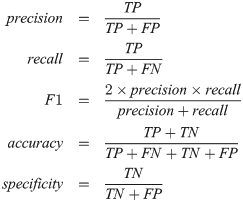

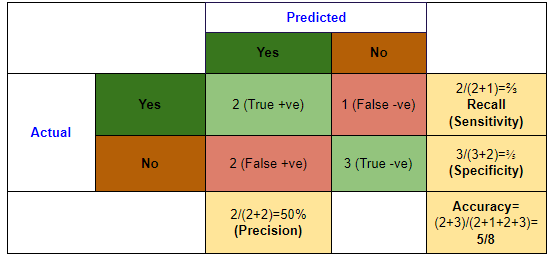

In [115]:
accuracy_score(y_test,y_pred)

# Bu metric datamda gerçek değerlerin ne kadarını doğru bildiğimi gösteriyor

0.8722222222222222

In [116]:
log_pipe.score(X_test, y_test)

# score fonksiyonu içine X_test, y_test verdiğimizde accuracy scoru döndürür.

0.8722222222222222

In [117]:
precision_score(y_test, y_pred, pos_label=1)

# default olarak 1 clasının precision_scorunu döndürür. 1 clasını doğru tahmin etmek için 
# yapılan tahminlerden ne kadarının isabetli olduğunu gösterir. 

# precision 0.1 demek model yaptığı tahminlerin %10'ununu tutturdu anlamına gelir.

# 0 clasına ait score için pos_label=0 olarak düzenlenmelidir.

0.8941176470588236

In [118]:
precision_score(y_test, y_pred, pos_label=0)

# default olarak 1 clasının precision_scorunu döndürür. 1 clasını doğru tahmin etmek için 
# yapılan tahminlerden ne kadarının isabetli olduğunu gösterir. 

# precision 0.1 demek model yaptığı tahminlerin %10'ununu tutturdu anlamına gelir.

# 0 clasına ait score için pos_label=0 olarak düzenlenmelidir.

0.8526315789473684

In [119]:
recall_score(y_test, y_pred,  pos_label=1)

# default olarak 1 clasının recall_scorunu döndürür. Modelin 1 classından ne kadarını doğru tespit edebildiğini gösterir

# recall 0.1 demek model 1 clasının sadece %10'nunu tespit edebilmiş anlamına geliyor.

# 0 clasına ait score için pos_label=0 olarak düzenlenmelidir.

0.8444444444444444

In [120]:
recall_score(y_test, y_pred,  pos_label=0)

0.9

In [121]:
f1_score(y_test,y_pred, pos_label=1)

# precision ve recall scorlarının harmonic ortalamasını döndürür. 
# Precision ve recall scorları arasında her zaman bir trade-off vardır.
# precision artarsa/azalırsa recall azalır/artar.

0.8685714285714287

In [122]:
f1_score(y_test,y_pred, pos_label=0)

0.8756756756756757

In [123]:
confusion_matrix(y_test,y_pred)

# confusion_matrix sade gösterimidir. True label ve predicted label eksenleri gösterilmediğinden kafa karışıklığına 
# neden olabilir.

array([[81,  9],
       [14, 76]], dtype=int64)

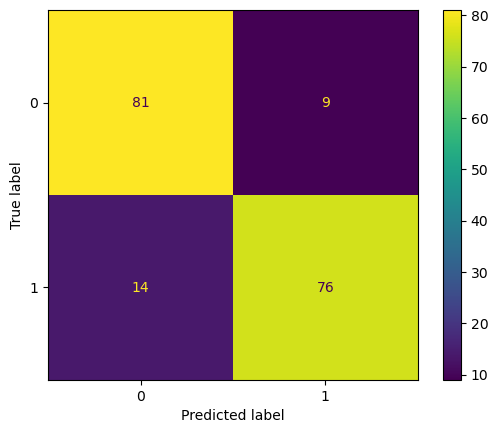

In [124]:
plot_confusion_matrix(log_pipe, X_test, y_test);

# True label ve predicted label eksenleri gösterildiğinden yorumlanması daha kolaydır.
# TP, FP, TN, FN confition matrix üzerinden çıkarılır.

In [125]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    
# hem train hem de test seti scorlarını gözlemleyebilmek için eval_metric fornksiyonumuzu tanımlıyoruz.

In [126]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test) 

# 1 label'ı için konuşacak olursak. 
# precision 0.89 demek yaptığım tahminlerin %89'ü isabetli anlamına geliyor.

# recall 0.84 demek gerçekte 1 olan classların %84'ini doğru tespit ettim anlamına geliyor.

# f1 score precision ve recall scorlarının harmonic ortalmasını verdiğinden hedef metriğinize (recall, precision)
# göre yorumlanması gerekir. Tek başına yorumlanması yanlış yorumlanmaya sebep verir.

# Datada overfiting olup olmadığı hedef classın test ve train scorları karşılaştırılarak karar verilir. 
# Train setinin scorları test datasından çok daha iyi ise arada uçurum var ise overfiting var demektir.

# Ancak datanın genelindeki train ve test datasına bakarak overfiting/underfiting kararı vermiyoruz. Kesin overfiting 
# underfiting kararını cross_validation sonrası vereceğiz.

Test_Set
[[81  9]
 [14 76]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        90
           1       0.89      0.84      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[317  43]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.88      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



### Cross Validate

In [127]:
import sklearn
sklearn.metrics.SCORERS.keys()

# classification modelleri için yapacağımız cross_validation ve gridsearchcv için kullanacağımız metriclerin listesi

# Bu listeden 'accuracy', 'precision','recall','f1' metriclerini alacağız.

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [128]:
model = Pipeline([("scaler",scaler),("log_model",log_model)])

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

# cross_validation üzerinden kesin overfiting/underfiting kararını verebilmek için her iterasyonda hem train hem de validation
# seti scorlarını karşılaştırabilmek için return_train_score=True olarak düzenliyoruz.

# Aşağıda döndürülen scorlar her zaman 1 clasına ait scorlardır. 0 clasına ait metriclerin CV scorları için ilave
# başka işlemler yapmamız gerekiyor.

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,0.017001,0.009002,0.935484,0.881789,0.805556,0.851852,0.865672,0.866562,0.875000,0.868827
2,0.016000,0.010000,0.857143,0.878981,0.833333,0.851852,0.845070,0.865204,0.847222,0.867284
3,0.020999,0.011006,0.842105,0.887097,0.888889,0.848765,0.864865,0.867508,0.861111,0.870370
4,0.020000,0.011001,0.767442,0.879365,0.916667,0.854938,0.835443,0.866980,0.819444,0.868827
5,0.017999,0.011002,0.933333,0.876972,0.777778,0.858025,0.848485,0.867395,0.861111,0.868827
6,0.018001,0.006000,0.903226,0.869159,0.777778,0.861111,0.835821,0.865116,0.847222,0.865741
7,0.015997,0.009009,0.942857,0.875399,0.916667,0.845679,0.929577,0.860283,0.930556,0.862654
8,0.016004,0.009000,0.804878,0.882166,0.916667,0.854938,0.857143,0.868339,0.847222,0.870370
9,0.021001,0.009999,0.857143,0.871069,0.833333,0.854938,0.845070,0.862928,0.847222,0.864198
10,0.022996,0.012010,0.967742,0.875796,0.833333,0.848765,0.895522,0.862069,0.902778,0.864198


In [129]:
df_scores.mean()[2:]  

# 1 labelına ait olan train ve validation scorları bu aşamada karşılaştırılıp kesin overfiting/undefiting 
# kararı veriliyor. Aşağıdaki scorlara göre overfiting olmadığını söyleyebiliriz.

test_precision     0.881135
train_precision    0.877779
test_recall        0.850000
train_recall       0.853086
test_f1            0.862267
train_f1           0.865238
test_accuracy      0.863889
train_accuracy     0.867130
dtype: float64

In [130]:
# yukardaki skorları kıyaslamak için koyduk

eval_metric(log_pipe, X_train, y_train, X_test, y_test) # to get the metrics for the model

# Burdan aldığımız scorlar modelin kesin ve nihai scorlarıdır. 
# Bu scorların gerçekten tutarlı scorlar olup olmadığına CV'dan aldığımız validation seti scorları ile 
# karşılaştırarak karar veriyoruz. 
# Eğer scorlar birbirene yakınsa test datasının scorları tutarlıdır diyebiliriz.

Test_Set
[[81  9]
 [14 76]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        90
           1       0.89      0.84      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[317  43]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.88      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



### GridSearchCV

In [131]:
log_pipe.get_params()

# gridsearchCV içerisinde eğer pipeline modeli kullanacaksak pipeline içerisine tanımlanmış olan ML algoritmasına ait
# hyper_parametrelerin listesini get_params() ile görebiliyoruz.

# gridsearchCv nin param_grid parametresinin içine yazacağımız hyper_parametreleri aşağıda belirtildiği haliyle yazmalıyız

# Dikkaet ederseniz pipeline içerisinde ML modeline verdiğimiz "logistic" isminden sonra 2 tane alt tire(__) sonra
# ML modelinin kendi hyper parametre isminin yazdığına dikkat edin.

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('log_model', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'log_model': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'log_model__C': 1.0,
 'log_model__class_weight': None,
 'log_model__dual': False,
 'log_model__fit_intercept': True,
 'log_model__intercept_scaling': 1,
 'log_model__l1_ratio': None,
 'log_model__max_iter': 100,
 'log_model__multi_class': 'auto',
 'log_model__n_jobs': None,
 'log_model__penalty': 'l2',
 'log_model__random_state': None,
 'log_model__solver': 'lbfgs',
 'log_model__tol': 0.0001,
 'log_model__verbose': 0,
 'log_model__warm_start': False}

Logistic Regression Hyperparametreleri : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [132]:
from sklearn.model_selection import GridSearchCV

In [133]:
# pipeline for logistic regression

model = Pipeline([("scaler",scaler),("log_model",log_model)]) 

# l1: Lasso, l2: Ridge
penalty = ["l1", "l2"] 

# -1 ile 5 arasında 20 tane C değeri elde etmek için 
# C arttıkça regülarizasyon düşer, alphanın tersi olarak
# C için np.logspace kullanmanın nedeni, düzenlileştirmenin optimal değerinin genellikle belirli bir aralıkta olmamasıdır.
# Bu nedenle, geniş bir aralıkta farklı değerleri denemek ve en iyi sonucu veren değeri bulmak için logaritmik bir ölçekte
# değerler oluşturmak mantıklıdır.
C = np.logspace(-1, 5, 20) 

# balanced: sınıf ağırlıkları dengeli, None: sınıf ağırlığı yok
class_weight= ["balanced", None] 
# dengesiz data setlerinde classları dengelemek için class_weight= "balanced" kullanabiliyoruz. Data dengelendiği zaman
# model az olan sınıfa ait precision scorunu artırarak o sınıfın recall scorunu artırmaya çalışır.

# solver ın dört değeri
solver = ["lbfgs", "liblinear", "sag", "saga"] 

# penalty, C, class_weight ve solver'ın tüm kombinasyonlarını elde etmek için
param_grid = {"log_model__penalty" : penalty,
              "log_model__C" : [C,1],  # hata alan alanlar "log_model__C" : C, yapsınlar
              "log_model__class_weight":class_weight,
              "log_model__solver":solver} 

# en iyi modeli elde etmek için
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = 'accuracy',   # Default olarak 1 sınıfının scorunu max. eder    
                          n_jobs = -1) # bütün işlemciler burda çalışsın diye

# GrdiseachCV aynı zamanda Cross Validation işlemi de yaptığı için validation ve train seti scorlarını elde edebilmek için
# return_train_score=True olarak belirtiyoruz. (scoring karşına yazdığımız metric scorunu döndürür sadece)

**penalty:** arka planda hangi regülarizasyon parametresinin uygulanacağını söylüyor. default l2; l1: Lasso, l2: Ridge

**C:** regülarizasyonun şiddeti, ridge ve lassodaki alpha gibi. Ancak değeri arttıkça regülarizasyon düşer, alphanın tersi olarak. Yani overfitting varsa C değeri düşürülmeli. default: 1

**class_weight:** dengesiz data setlerinde classları dengelemek için class_weight= "balanced" kullanabiliyoruz. Data dengelendiği zaman model az olan sınıfa ait precision scorunu artırarak o sınıfın recall scorunu artırmaya çalışır. class weights are balanced, None: no class weights 

**solver:** modelimizde arka planda bir optimizasyon oluyor değil mi hatanın minimize etmek için. Solver da optimizasyon aşamasında uyguladığı farklı algoritmalar var. default: lbfgs

In [134]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log_model__C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                          1],
                         'log_model__class_weight': ['balanced', None],
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['lbfgs', 'liblinear', 'sag',
                                               'saga']},
             scoring='accuracy')

In [135]:
grid_model.best_params_

# best_params_ param_grid içerisine tanımladığım tüm hyper_parametre uzayları içerisindeki 
# en iyi hyper_parameter değerlerini döndürür.

{'log_model__C': 1,
 'log_model__class_weight': 'balanced',
 'log_model__penalty': 'l1',
 'log_model__solver': 'liblinear'}

In [136]:
grid_model.best_index_

# en iyi scorun alındığı df indexini döndürür.

17

In [137]:
grid_model.best_score_

0.8652777777777778

In [138]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)  

# test seti doğruluğu 0,87'den 0,88'e yükseldi, 21 yanlış tahmin
# yukardaki test setine göre 1 puan artmış, hata sayısı da 23den 21e düşmüş

Test_Set
[[79 11]
 [10 80]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        90
           1       0.88      0.89      0.88        90

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180


Train_Set
[[316  44]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.87      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

- classification problemlerinde model performansı için baktığımız diğer metrikler dengeli data setleri için **ROC-AUC scoru**, dengesiz data setleri için **average precision skorudur**

- dengesiz data setleri için ROC-AUC score çok daha iyimser scorlar (yanlış scorlar) döndürdüğünden kullanılmaz.

- bu scorlar modelin genel performansı olarak isimlendirilir ve modelin hedef classımızı diğer class/classlardan
ayrıştırmada ne kadar başarılı olduğunu gösterir.

- AUC, bir ayrılabilirlik derecesini veya ölçüsünü temsil eder. Modelin sınıfları ne kadar ayırt edebildiğini bize söyler.

- logistik modelimiz 0.5 thresholduna göre True positif rate (recall) ya da false positif rate (1-recall yani specifity) hesaplamakta

- ROC AUC tüm thresholdlar için True positif rate ya da false positif rate hesaplamakta onun üzerinden bir line çiziyor

**ROC Eğrisinin Amacı:**

1. Bir sınıflandırıcının gücünü/tahmin gücünü analiz etmek. 

2. Optimal eşiğin belirlenmesi.

3. İki modelin karşılaştırılması (eğrinin altındaki alan kullanılarak).

**ROC Eğrisi (Receiver Operating Characteristic)**

- Kökenleri İkinci Dünya Savaşı'na dayanmaktadır. 

- İkinci Dünya Savaşı sırasında radar sinyal işleme tekniklerini değerlendirmek için kullanılan bir araçtır. Bu eğri, radar operatörlerinin düşman uçaklarını tespit etme yeteneğini ölçmek için geliştirilmiştir.

- Pearl Harbor saldırısından sonra, ABD ordusu radar teknolojisini geliştirmek için yoğun bir çaba içine girdi. Bu çabaların bir parçası olarak, radar sinyallerinin doğruluğunu ve güvenilirliğini değerlendirmek için ROC eğrisi kullanıldı. Buradaki temel amaç, düşman uçaklarını doğru bir şekilde tespit ederken yanlış alarm oranını en aza indirmekti.

- ROC eğrisi, bir sınıflandırıcının tüm olası eşik değerleri için gerçek pozitif oranı (True Positive Rate) ile yanlış pozitif oranı (False Positive Rate) arasındaki ilişkiyi gösterir. Bu, sınıflandırıcının performansını değerlendirmek için mükemmel bir araçtır, çünkü sadece bir eşik değeri için değil, tüm olası eşik değerleri için performansı gösterir.

- Amaç, tahmin edicinin, false pozitifleri en aza indirirken mümkün olduğunca çok sayıda gerçek pozitifin tespit edilmesini sağlamadaki tahmin gücünü analiz etmektir.

## ROC AUC Curve 

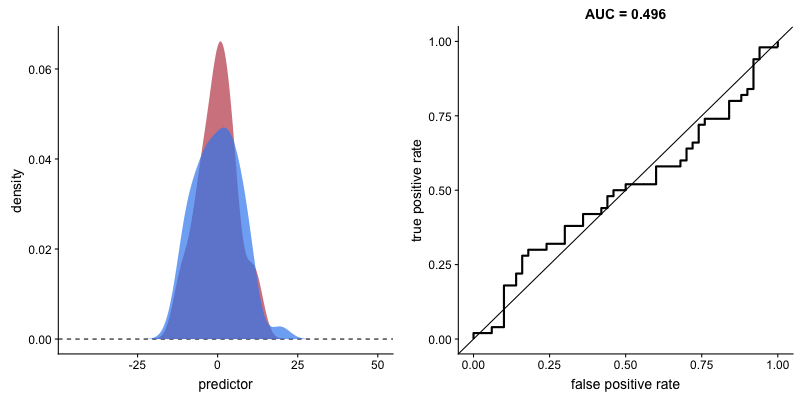

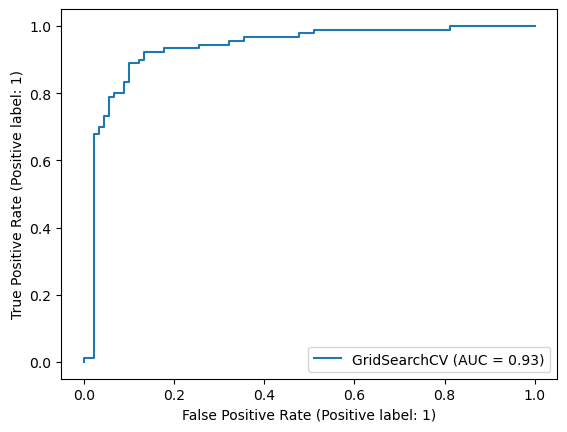

In [139]:
plot_roc_curve(grid_model, X_test, y_test); 

# Modelim iki üzüm türünü hangi ölçüde ayrıştırabiliyor

# datam dengeli olduğundan AUC scoruna bakıyoruz. AUC =0.93 modelim 1 labelını 0 labelından
# ayrıştırmada ortalama %93 oranında başarılı demek.

# gridsearch yaptıktan sonraki hali

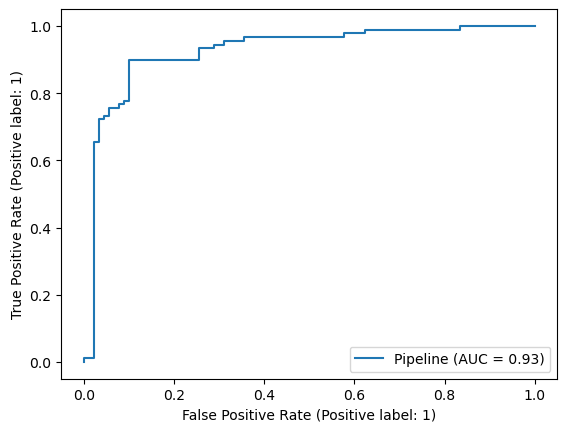

In [140]:
plot_roc_curve(log_pipe, X_test, y_test); 

# gridsearch yapmadan önceki hali

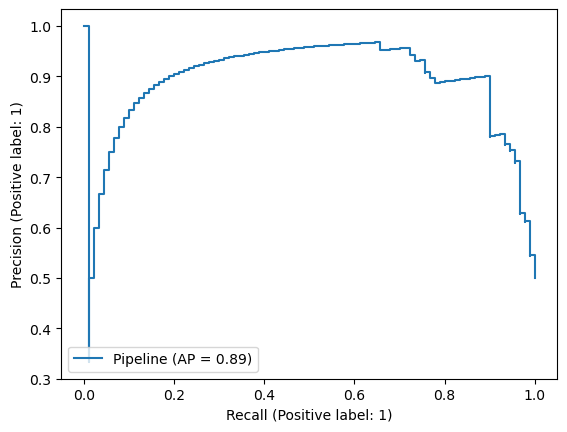

In [141]:
plot_precision_recall_curve(log_pipe, X_test, y_test);

# dengeli data setlerinde hem AUC score hem de Average precision score birbirlerine yakın değerler döndürse de
# dengeli data setleri için AUC, dengesiz veri setleri için average precision scorlarını kullanmayı alışkanlık haline getirelim.

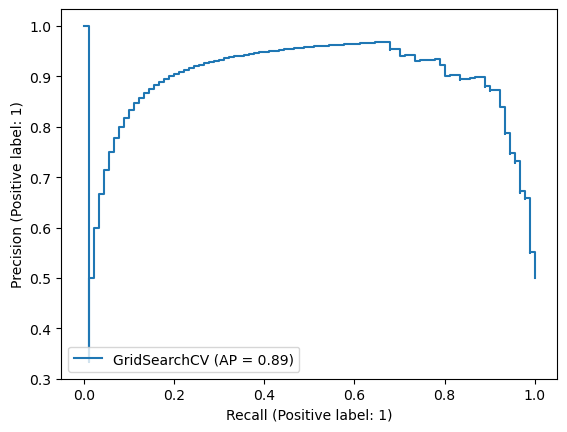

In [142]:
plot_precision_recall_curve(grid_model, X_test, y_test);

In [143]:
average_precision_score(y_test, y_pred_proba[:,1])

0.8870128026631419

# Prediction

In [144]:
new_data = pd.read_excel("Raisin_Dataset_new.xlsx") 

In [145]:
final_scaler = StandardScaler()
final_model = LogisticRegression()

# final_pipe = Pipeline([("scaler", final_scaler), ("log_model", final_model)])
# # Modelinizi tüm veri setiyle eğitme
# final_pipe.fit(X, y)

# # Tahminde bulunun
# predictions = final_pipe.predict(new_data)
# positive_class_proba = final_pipe.predict_proba(new_data)[:, 1]
# # Tahmin sonuçlarını göster
# results = pd.DataFrame({
#     'Tahmin': predictions,
#     'Pozitif Sınıf Olasılığı': positive_class_proba
# })

# results

# hepsi tek bir hücrede çalışabilir

In [146]:
final_pipe = Pipeline([("scaler", final_scaler), ("log_model", final_model)])

In [147]:
final_pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_model', LogisticRegression())])

In [148]:
predictions = final_pipe.predict(new_data)

In [149]:
positive_class_proba = final_pipe.predict_proba(new_data)[:, 1]

In [150]:
results = pd.DataFrame({
    'Tahmin': predictions,
    'Pozitif Sınıf Olasılığı': positive_class_proba
})

results

,Tahmin,Pozitif Sınıf Olasılığı
0,1,0.651376
1,0,0.132203
2,0,0.086283
3,0,0.024742
4,0,0.123196
5,1,0.572805
6,1,0.743543
7,1,0.728312
8,1,0.863969
9,1,0.938375


# Conclusion 